In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('/content/drive/My Drive/2011-capitalbikeshare-tripdata.csv')

In [ ]:
data.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
cols = ['Start date', 'Start station number', 'Duration', 'End date', 'End station number']
label = ['End station number']
input = data[cols].copy()

In [ ]:
data.drop_duplicates('Start station number')

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual
...,...,...,...,...,...,...,...,...,...
1206635,370,2011-12-21 19:03:48,2011-12-21 19:09:59,31307,3000 Connecticut Ave NW / National Zoo,31104,Adams Mill & Columbia Rd NW,W01467,Member
1208738,772,2011-12-22 13:32:07,2011-12-22 13:45:00,31707,Benning Rd & East Capitol St NE / Benning Rd M...,31708,Anacostia Ave & Benning Rd NE / River Terrace,W00369,Member
1208779,988,2011-12-22 13:45:22,2011-12-22 14:01:51,31708,Anacostia Ave & Benning Rd NE / River Terrace,31606,Potomac & Pennsylvania Ave SE,W01197,Member
1209937,134,2011-12-22 18:25:53,2011-12-22 18:28:07,31626,15th St & Massachusetts Ave SE,31607,14th & D St SE,W01329,Member


In [ ]:
input['Start date']

0         2011-01-01 00:01:29
1         2011-01-01 00:02:46
2         2011-01-01 00:06:13
3         2011-01-01 00:09:21
4         2011-01-01 00:28:26
                  ...        
1226762   2011-12-31 23:41:19
1226763   2011-12-31 23:46:43
1226764   2011-12-31 23:47:27
1226765   2011-12-31 23:55:12
1226766   2011-12-31 23:55:56
Name: Start date, Length: 1226767, dtype: datetime64[ns]

In [ ]:
input['Start date'] = pd.to_datetime(input['Start date'],format='%Y-%m-%d %H:%M:%S')
input['Start date'] = input['Start date'].astype(int)
input['End date'] = pd.to_datetime(input['End date'],format='%Y-%m-%d %H:%M:%S')
input['End date'] = input['End date'].astype(int)
input

,Start date,Start station number,Duration,End date,End station number
0,1293840089000000000,31620,3548,1293843637000000000,31620
1,1293840166000000000,31105,346,1293840512000000000,31101
2,1293840373000000000,31400,562,1293840936000000000,31104
3,1293840561000000000,31111,434,1293840996000000000,31503
4,1293841706000000000,31104,233,1293841939000000000,31106
...,...,...,...,...,...
1226762,1325374879000000000,31201,300,1325375180000000000,31214
1226763,1325375203000000000,31223,387,1325375590000000000,31201
1226764,1325375247000000000,31107,261,1325375509000000000,31602
1226765,1325375712000000000,31205,2060,1325377773000000000,31222


In [ ]:
data.drop_duplicates('Start station number')

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual
...,...,...,...,...,...,...,...,...,...
1206635,370,2011-12-21 19:03:48,2011-12-21 19:09:59,31307,3000 Connecticut Ave NW / National Zoo,31104,Adams Mill & Columbia Rd NW,W01467,Member
1208738,772,2011-12-22 13:32:07,2011-12-22 13:45:00,31707,Benning Rd & East Capitol St NE / Benning Rd M...,31708,Anacostia Ave & Benning Rd NE / River Terrace,W00369,Member
1208779,988,2011-12-22 13:45:22,2011-12-22 14:01:51,31708,Anacostia Ave & Benning Rd NE / River Terrace,31606,Potomac & Pennsylvania Ave SE,W01197,Member
1209937,134,2011-12-22 18:25:53,2011-12-22 18:28:07,31626,15th St & Massachusetts Ave SE,31607,14th & D St SE,W01329,Member


In [ ]:
input.drop('End date',axis=1)

,Start date,Start station number,Duration,End station number
0,1293840089000000000,31620,3548,31620
1,1293840166000000000,31105,346,31101
2,1293840373000000000,31400,562,31104
3,1293840561000000000,31111,434,31503
4,1293841706000000000,31104,233,31106
...,...,...,...,...
1226762,1325374879000000000,31201,300,31214
1226763,1325375203000000000,31223,387,31201
1226764,1325375247000000000,31107,261,31602
1226765,1325375712000000000,31205,2060,31222


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(input.drop('End date',axis=1))
scaled_features = scaler.transform(input.drop('End station number',axis=1))
data_feat = pd.DataFrame(scaled_features,columns=input.columns[:-1])
data_feat.head()

,Start date,Start station number,Duration,End date
0,-2.256360,1.721395,0.956786,6.721887e+15
1,-2.256350,-0.942279,-0.336732,6.721871e+15
2,-2.256323,0.583515,-0.249474,6.721873e+15
3,-2.256299,-0.911246,-0.301183,6.721873e+15
4,-2.256151,-0.947451,-0.382381,6.721878e+15


In [ ]:
from sklearn.model_selection import train_test_split

X = data_feat
y = data['End station number']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#從k值=1開始測試
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 30   0   0 ...   0   0   0]
 [  0 114   1 ...   0   0   0]
 [  1   0 114 ...   0   1   0]
 ...
 [  0   1   1 ...   1   0   0]
 [  0   0   1 ...   0   5   0]
 [  0   0   0 ...   0   0   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       31000       0.10      0.11      0.11       264
       31001       0.11      0.11      0.11      1006
       31002       0.11      0.11      0.11      1049
       31003       0.10      0.11      0.10      1030
       31004       0.08      0.08      0.08       508
       31005       0.11      0.11      0.11       533
       31006       0.12      0.10      0.11       878
       31007       0.06      0.06      0.06      2493
       31008       0.09      0.08      0.09       679
       31009       0.07      0.07      0.07      1563
       31010       0.07      0.07      0.07      1308
       31011       0.07      0.07      0.07      1460
       31012       0.04      0.03      0.03       610
       31013       0.10      0.10      0.10       714
       31014       0.10      0.09      0.10      1925
       31015       0.11      0.11      0.11       967
       31016       0.10      0.09      0.10       333
       31017       0.26    

Text(0, 0.5, 'Error Rate')

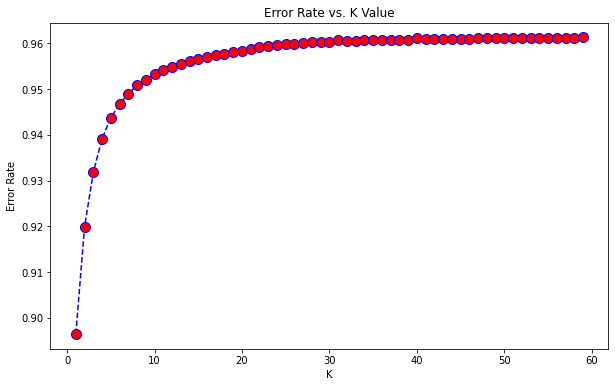

In [ ]:
error_rate = []

for i in range(1,60):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


#將k=1~60的錯誤率製圖畫出。k=23之後，錯誤率就在5%-6%之間震盪，
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[ 30   0   0 ...   0   0   0]
 [  0 114   1 ...   0   0   0]
 [  1   0 114 ...   0   1   0]
 ...
 [  0   1   1 ...   1   0   0]
 [  0   0   1 ...   0   5   0]
 [  0   0   0 ...   0   0   0]]




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       31000       0.10      0.11      0.11       264
       31001       0.11      0.11      0.11      1006
       31002       0.11      0.11      0.11      1049
       31003       0.10      0.11      0.10      1030
       31004       0.08      0.08      0.08       508
       31005       0.11      0.11      0.11       533
       31006       0.12      0.10      0.11       878
       31007       0.06      0.06      0.06      2493
       31008       0.09      0.08      0.09       679
       31009       0.07      0.07      0.07      1563
       31010       0.07      0.07      0.07      1308
       31011       0.07      0.07      0.07      1460
       31012       0.04      0.03      0.03       610
       31013       0.10      0.10      0.10       714
       31014       0.10      0.09      0.10      1925
       31015       0.11      0.11      0.11       967
       31016       0.10      0.09      0.10       333
       31017       0.26    

In [ ]:
knn = KNeighborsClassifier(n_neighbors=40)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=40')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=40


[[ 3  0  1 ...  0  0  0]
 [ 0  6  4 ...  0  0  0]
 [ 0  1 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       31000       0.02      0.01      0.01       264
       31001       0.01      0.01      0.01      1006
       31002       0.03      0.01      0.02      1049
       31003       0.02      0.01      0.02      1030
       31004       0.01      0.00      0.00       508
       31005       0.01      0.00      0.01       533
       31006       0.02      0.01      0.01       878
       31007       0.02      0.01      0.02      2493
       31008       0.01      0.00      0.00       679
       31009       0.02      0.01      0.01      1563
       31010       0.01      0.00      0.01      1308
       31011       0.01      0.01      0.01      1460
       31012       0.00      0.00      0.00       610
       31013       0.01      0.00      0.00       714
       31014       0.03      0.02      0.02      1925
       31015       0.02      0.01      0.01       967
       31016       0.03      0.01      0.01       333
       31017       0.00    